This notebook explores the expected number of core bugs under the null model.

I ran the input tidy data with:

`python src/analysis/null_core.py data/analysis_results/qvalues.mean.kruskal-wallis.case-control.txt 0.05 data/analysis_results/null_core.txt --reps 100`

The `null_core.py` script takes in a table of signed q-values per dataset, shuffles each dataset's qvalues (while preserving the structure of NaN's), and recalculates the number of core bugs.

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
fname = '../../data/analysis_results/null_core.txt'
df = pd.read_csv(fname, sep='\t')

In [9]:
df.head()

,rep,type,n
0,0,health,33
1,0,mixed,12
2,0,disease,26
3,1,health,33
4,1,mixed,14


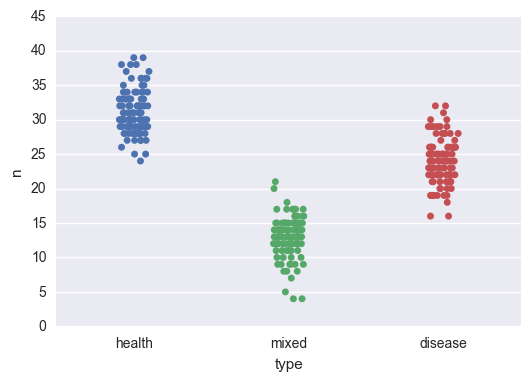

In [11]:
sns.stripplot(data=df, x='type', y='n', jitter=True)